<a href="https://colab.research.google.com/github/Dantusaikamal/Attendance-assistance/blob/master/Human_detection_convenience_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing libraries

In [12]:
# For Multidimensional Array Processing
import numpy as np

# OpenCV or Computer Vision library in python
# '''WRITE CODE TO IMPORT OPENCV LIBRARY GOES BY THE NAME OF cv2'''

import cv2


# for displaying images in google colab
from google.colab.patches import cv2_imshow

# Step 2: Downloading Image to be tested on

Downloading the image to be processed using wget command and storing it with name **test_image.png**. <br>
-O option helps to save downloaded file with desired output name

We use **!** i.e. **exclamation mark** so that all shell commands can be executed within jupyter notebook.

In [13]:
!wget -O test_image.png https://i.pinimg.com/originals/01/0e/84/010e849bf443fa8a5706605d48ca3223.jpg

--2021-06-13 17:12:40--  https://i.pinimg.com/originals/01/0e/84/010e849bf443fa8a5706605d48ca3223.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.71.49.9, 2600:1417:76:2ad::1931, 2600:1417:76:29c::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|104.71.49.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213320 (208K) [image/jpeg]
Saving to: ‘test_image.png’

test_image.png      100%[===================>] 208.32K  --.-KB/s    in 0.05s   

2021-06-13 17:12:41 (4.35 MB/s) - ‘test_image.png’ saved [213320/213320]



In [14]:
# using imread function present in cv2 to read the image and load that as an array into Google Colaboratory Environment

image = cv2.imread('test_image.png')

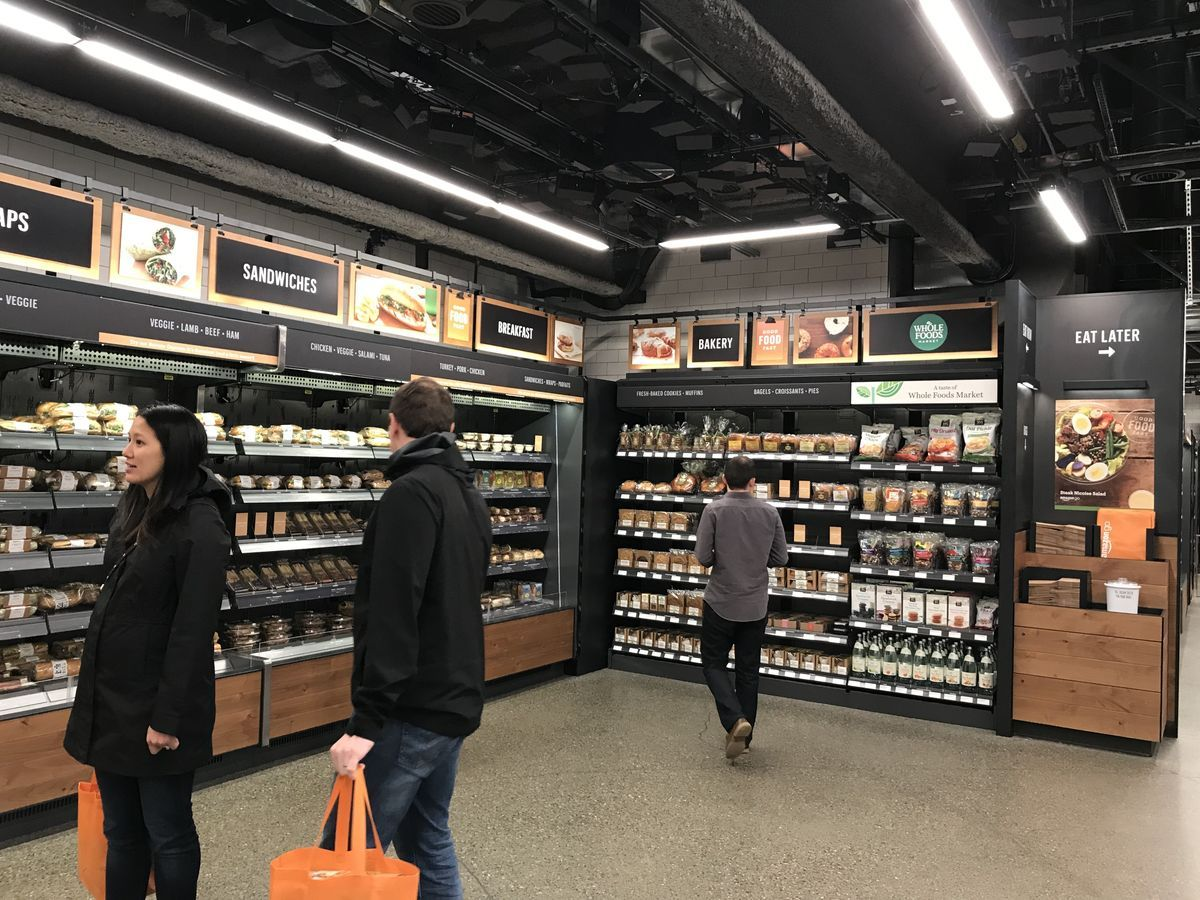

In [15]:
# code to show the image

cv2_imshow(image)

# Step 3: Downloading all YOLO3 files

All the YOLOv3 files are taken from their offical website https://pjreddie.com/darknet/yolo/ <br>
and their offical Github repository https://github.com/ultralytics/yolov3.

It would take several hours to download it so for the conviencence we have already hosted them on our web server from where they can be easily downloaded.

URL for all YOLO files



1.  coco.names -> https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724162_coco.names
2.   yolov3.cfg -> https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724216_yolov3.cfg
3. yolov3.weights -> https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611725584_yolov3.weights





In [16]:
!wget -O coco.names https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724162_coco.names
!wget -O yolov3.cfg https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724216_yolov3.cfg

--2021-06-13 17:12:41--  https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724162_coco.names
Resolving d24c4belkzmc2t.cloudfront.net (d24c4belkzmc2t.cloudfront.net)... 13.225.100.164, 13.225.100.23, 13.225.100.4, ...
Connecting to d24c4belkzmc2t.cloudfront.net (d24c4belkzmc2t.cloudfront.net)|13.225.100.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 705 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     705  --.-KB/s    in 0s      

2021-06-13 17:12:42 (166 MB/s) - ‘coco.names’ saved [705/705]

--2021-06-13 17:12:42--  https://d24c4belkzmc2t.cloudfront.net/cdn-uploads/1611724216_yolov3.cfg
Resolving d24c4belkzmc2t.cloudfront.net (d24c4belkzmc2t.cloudfront.net)... 13.225.100.164, 13.225.100.23, 13.225.100.4, ...
Connecting to d24c4belkzmc2t.cloudfront.net (d24c4belkzmc2t.cloudfront.net)|13.225.100.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9131 (8.9K) [text/plain]
Saving to: ‘yolov

In [17]:
# '''Write code to download yolov3.weights file using wget command'''
!wget "https://pjreddie.com/media/files/yolov3.weights"


--2021-06-13 17:12:42--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  23.2MB/s    in 11s     

2021-06-13 17:12:54 (21.4 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



# Step 4: Loading YOLO model by loading all weights and configuration files

In [18]:
# loading all different classes available in coco.names file and saving them in LABELS variable
LABELS = open("coco.names").read().strip().split("\n")

In [19]:
# loading our YOLOv3 network using function available in opencv which requires configuration and weights file to be passed
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

Since, we are using YOLOv3 algorithm so we need not to train it but pass image and get output.<br>

YOLOv3 has 3 output layers **(82, 94 and 106)** as the figure shows.

<img src = "https://i.stack.imgur.com/eZkfj.png">

**getLayerNames()** function get the name of all layers of the network. <br>
**getUnconnectedOutLayers()** get the index of the output layers.

These two functions are used for getting the output layers **82, 94, 106**

To get the corresponding indexes, we need to do layer_names[i[0] - 1].

In [20]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


# Step 5: Processing Downloaded Image through YOLO model

In [21]:
# initialising a variable which will counter number of persons
person_counter = 0

# getting height and width of the image
H, W = image.shape[:2]

# preprocessing image so that illumination condition wont affect the detection of person through YOLO algorithm
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB = True, crop = False)

# setting the input as the image loaded above and passing it in the yolo network
net.setInput(blob)

# forward propagation the model and getting the output (3 outputs)
layerOutputs = net.forward(ln)

# '''probability to assign a class to an object. MAKE IT 0.99'''
confidence_level =  0.99
# since 3 output recieved hence iterating over each and every output
for output in layerOutputs:
    for detection in output:
        scores = detection[5:]          # storing prediction probabilities for all 80 different classes recieved after output from YOLO model
        classID = np.argmax(scores)     # finding which class has maximum probability
        confidence = scores[classID]    # finding the prediction probability which is highest
        if confidence > confidence_level:           # checking if probability is higher than 98%
          text = LABELS[classID]        # finding the label text corresponding to highest probability
          if text == 'person':          # detecting only person
            person_counter = person_counter + 1    # counting number of persons
            center_x, center_y, width, height = detection[0:4]      # finding location of person/object detected
            center_x, center_y, width, height = int(center_x * W), int(center_y * H), int(width * W), int(height * H)     # scaling detected coordinates to original scale
            x = int(center_x - (width / 2))                         # finding top left x coordinate to construct a rectangle
            y = int(center_y - (height / 2))                        # finding top left y coordinate to construct a rectangle
            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)       # constructing a rectangle
            text = 'Person {}'.format(person_counter)                                   
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2) # putting a text for unique person detected
            

# '''Code to print the variable person_counter'''

# Step 6: Displaying Output Image

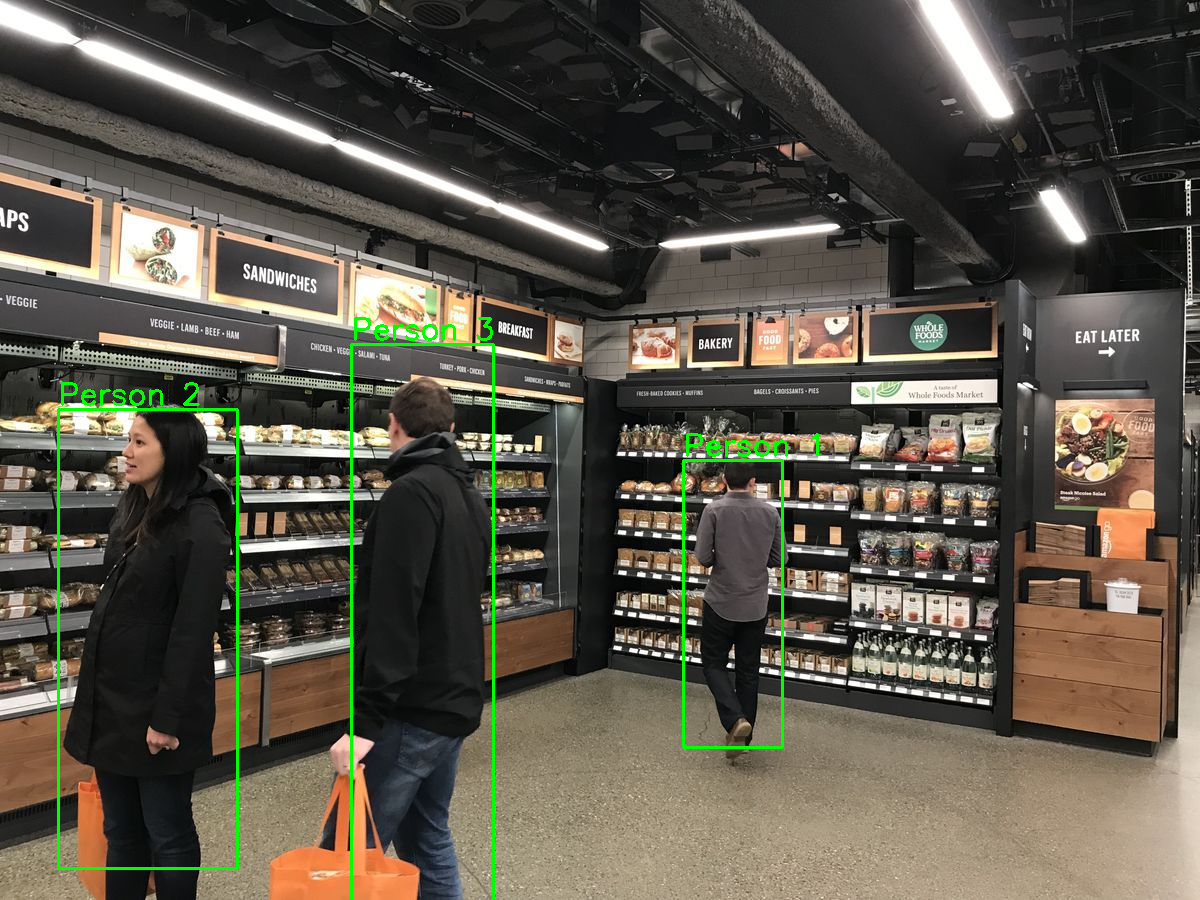

In [22]:
cv2_imshow(image)